Lets first import CIFAR-10 Dataset and see what's going on!

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


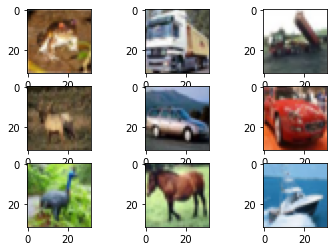

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10

(trainX, trainY), (testX, testY) = cifar10.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))


for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i])
pyplot.show()

In [2]:
input_shape = (32,32,3)
output_shape = 10

One-Hot Encoding the Target Value

In [3]:
from keras.utils.np_utils import to_categorical

trainY = to_categorical(trainY)
testY = to_categorical(testY)

Prepare and Normalize Data

In [4]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

Defining The Convlutional Supervised Autoencoder

In [5]:
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D, Flatten
from keras import models
from keras.layers.merge import Concatenate

input_img = Input(shape=input_shape)

encode1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encode2 = Conv2D(8, (3, 3), activation='relu', padding='same')(encode1)
encode3 = MaxPooling2D((2, 2), padding='same')(encode2)
encode4 = Conv2D(8, (3, 3), activation='relu', padding='same')(encode3)
bottleneck = MaxPooling2D((2, 2), padding='same')(encode4)

decode1 = Conv2D(8, (3, 3), activation='relu', padding='same')(bottleneck)
decode2 = UpSampling2D((2, 2))(decode1)
decode3 = Conv2D(8, (3, 3), activation='relu', padding='same')(decode2)
decode4 = UpSampling2D((2, 2))(decode3)
decode5 = Conv2D(16, (3, 3), activation='relu', padding='same')(decode4)
decode6 = Conv2D(3, (3, 3), activation='relu', padding='same')(decode5)

hidden0 = Flatten()(bottleneck)
hidden1 = Dense(16, activation='relu')(hidden0)
hidden2 = Dense(16, activation='relu')(hidden1)
output = Dense(output_shape, activation='softmax')(hidden2)

csae = models.Model(input_img, [decode6, output])

csae.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   448         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 8)    1160        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 8)    0           ['conv2d_1[0][0]']               
                                                                                              

Optimizer Settings

In [6]:
from tensorflow.keras import optimizers
from keras.losses import huber, MSE

learning_rate = 1E-3 # to be tuned!

csae.compile(loss=[MSE,'categorical_crossentropy'], optimizer=optimizers.Adam(lr=learning_rate),metrics=['acc'])

c:\users\mesto\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training The Model

In [7]:
history = csae.fit(trainX, [trainX, trainY], 
                   batch_size=128, 
                   epochs=100, 
                   validation_split=0.1)

Epoch 1/100
352/352 [==============================] - 7s 13ms/step - loss: 2.0197 - conv2d_6_loss: 0.0345 - dense_2_loss: 1.9852 - conv2d_6_acc: 0.4400 - dense_2_acc: 0.2491 - val_loss: 1.7097 - val_conv2d_6_loss: 0.0149 - val_dense_2_loss: 1.6948 - val_conv2d_6_acc: 0.5521 - val_dense_2_acc: 0.3682
Epoch 2/100
352/352 [==============================] - 4s 11ms/step - loss: 1.6366 - conv2d_6_loss: 0.0135 - dense_2_loss: 1.6231 - conv2d_6_acc: 0.5845 - dense_2_acc: 0.4005 - val_loss: 1.5652 - val_conv2d_6_loss: 0.0119 - val_dense_2_loss: 1.5534 - val_conv2d_6_acc: 0.6285 - val_dense_2_acc: 0.4250
Epoch 3/100
352/352 [==============================] - 4s 11ms/step - loss: 1.5244 - conv2d_6_loss: 0.0117 - dense_2_loss: 1.5127 - conv2d_6_acc: 0.6237 - dense_2_acc: 0.4430 - val_loss: 1.4926 - val_conv2d_6_loss: 0.0112 - val_dense_2_loss: 1.4814 - val_conv2d_6_acc: 0.6469 - val_dense_2_acc: 0.4578
Epoch 4/100
352/352 [==============================] - 4s 11ms/step - loss: 1.4655 - conv2d_6_

352/352 [==============================] - 4s 11ms/step - loss: 1.1129 - conv2d_6_loss: 0.0117 - dense_2_loss: 1.1012 - conv2d_6_acc: 0.6814 - dense_2_acc: 0.6023 - val_loss: 1.1296 - val_conv2d_6_loss: 0.0115 - val_dense_2_loss: 1.1181 - val_conv2d_6_acc: 0.6562 - val_dense_2_acc: 0.6074
Epoch 29/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1095 - conv2d_6_loss: 0.0118 - dense_2_loss: 1.0977 - conv2d_6_acc: 0.6808 - dense_2_acc: 0.6050 - val_loss: 1.1344 - val_conv2d_6_loss: 0.0114 - val_dense_2_loss: 1.1230 - val_conv2d_6_acc: 0.6793 - val_dense_2_acc: 0.6006
Epoch 30/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1004 - conv2d_6_loss: 0.0119 - dense_2_loss: 1.0886 - conv2d_6_acc: 0.6821 - dense_2_acc: 0.6079 - val_loss: 1.1336 - val_conv2d_6_loss: 0.0122 - val_dense_2_loss: 1.1214 - val_conv2d_6_acc: 0.6541 - val_dense_2_acc: 0.6108
Epoch 31/100
352/352 [==============================] - 4s 11ms/step - loss: 1.0916 - conv2d_6_loss: 0.0

352/352 [==============================] - 4s 12ms/step - loss: 0.9721 - conv2d_6_loss: 0.0130 - dense_2_loss: 0.9592 - conv2d_6_acc: 0.6913 - dense_2_acc: 0.6591 - val_loss: 1.0507 - val_conv2d_6_loss: 0.0136 - val_dense_2_loss: 1.0371 - val_conv2d_6_acc: 0.6326 - val_dense_2_acc: 0.6406
Epoch 56/100
352/352 [==============================] - 4s 11ms/step - loss: 0.9727 - conv2d_6_loss: 0.0130 - dense_2_loss: 0.9597 - conv2d_6_acc: 0.6907 - dense_2_acc: 0.6592 - val_loss: 1.0467 - val_conv2d_6_loss: 0.0127 - val_dense_2_loss: 1.0340 - val_conv2d_6_acc: 0.7052 - val_dense_2_acc: 0.6410
Epoch 57/100
352/352 [==============================] - 4s 11ms/step - loss: 0.9692 - conv2d_6_loss: 0.0131 - dense_2_loss: 0.9562 - conv2d_6_acc: 0.6905 - dense_2_acc: 0.6608 - val_loss: 1.0329 - val_conv2d_6_loss: 0.0134 - val_dense_2_loss: 1.0195 - val_conv2d_6_acc: 0.7079 - val_dense_2_acc: 0.6486
Epoch 58/100
352/352 [==============================] - 4s 11ms/step - loss: 0.9671 - conv2d_6_loss: 0.0

352/352 [==============================] - 4s 12ms/step - loss: 0.9236 - conv2d_6_loss: 0.0137 - dense_2_loss: 0.9099 - conv2d_6_acc: 0.6848 - dense_2_acc: 0.6743 - val_loss: 0.9919 - val_conv2d_6_loss: 0.0132 - val_dense_2_loss: 0.9787 - val_conv2d_6_acc: 0.6917 - val_dense_2_acc: 0.6654
Epoch 83/100
352/352 [==============================] - 4s 12ms/step - loss: 0.9221 - conv2d_6_loss: 0.0138 - dense_2_loss: 0.9084 - conv2d_6_acc: 0.6821 - dense_2_acc: 0.6768 - val_loss: 0.9960 - val_conv2d_6_loss: 0.0135 - val_dense_2_loss: 0.9825 - val_conv2d_6_acc: 0.6694 - val_dense_2_acc: 0.6674
Epoch 84/100
352/352 [==============================] - 6s 18ms/step - loss: 0.9185 - conv2d_6_loss: 0.0137 - dense_2_loss: 0.9048 - conv2d_6_acc: 0.6837 - dense_2_acc: 0.6791 - val_loss: 0.9948 - val_conv2d_6_loss: 0.0133 - val_dense_2_loss: 0.9815 - val_conv2d_6_acc: 0.6848 - val_dense_2_acc: 0.6676
Epoch 85/100
352/352 [==============================] - 6s 17ms/step - loss: 0.9178 - conv2d_6_loss: 0.0

Plotting the results

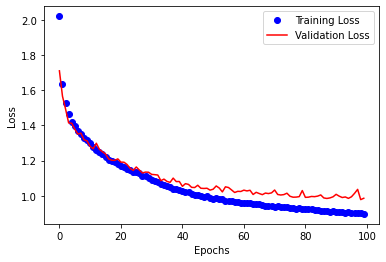

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Using the encoder for fine-tuning

In [9]:
sae_encoder = models.Model(input_img, bottleneck)
sae_encoder.summary()

bottle_neck_train = sae_encoder.predict(trainX)
bottle_neck_test = sae_encoder.predict(testX)

print('bottle_neck_train:{}'.format(bottle_neck_train.shape))
print('bottle_neck_test:{}'.format(bottle_neck_test.shape))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         1160      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                       

Build Classifier for fine-tune

In [10]:
input_feat = Input(shape=(8,8,8))

hidden0 = Flatten()(input_feat)
hidden1 = Dense(16, activation='relu')(hidden0)
hidden2 = Dense(16, activation='relu')(hidden1)
output = Dense(output_shape, activation='softmax')(hidden2)

classifier = models.Model(input_feat, output)

classifier.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8, 8, 8)]         0         
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                8208      
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 8,650
Trainable params: 8,650
Non-trainable params: 0
_________________________________________________________________


In [11]:
classifier.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=learning_rate),metrics=['acc'])

history = classifier.fit(bottle_neck_train, trainY, 
                        batch_size=128, 
                        epochs=50, 
                        validation_split=0.1)

Epoch 1/50


c:\users\mesto\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


352/352 [==============================] - 2s 6ms/step - loss: 1.5982 - acc: 0.4298 - val_loss: 1.3352 - val_acc: 0.5206
Epoch 2/50
352/352 [==============================] - 2s 5ms/step - loss: 1.1724 - acc: 0.5801 - val_loss: 1.1288 - val_acc: 0.5986
Epoch 3/50
352/352 [==============================] - 2s 5ms/step - loss: 1.0598 - acc: 0.6217 - val_loss: 1.0892 - val_acc: 0.6054
Epoch 4/50
352/352 [==============================] - 2s 4ms/step - loss: 1.0130 - acc: 0.6413 - val_loss: 1.0403 - val_acc: 0.6308
Epoch 5/50
352/352 [==============================] - 2s 4ms/step - loss: 0.9870 - acc: 0.6490 - val_loss: 1.0375 - val_acc: 0.6458
Epoch 6/50
352/352 [==============================] - 1s 3ms/step - loss: 0.9695 - acc: 0.6537 - val_loss: 1.0092 - val_acc: 0.6472
Epoch 7/50
352/352 [==============================] - 1s 4ms/step - loss: 0.9582 - acc: 0.6595 - val_loss: 1.0172 - val_acc: 0.6390
Epoch 8/50
352/352 [==============================] - 1s 3ms/step - loss: 0.9451 - acc:

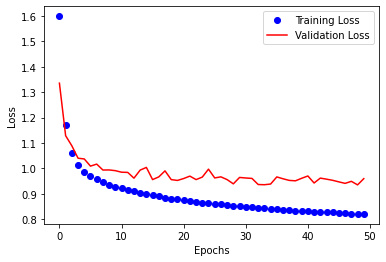

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
bottle_neck_test = sae_encoder.predict(testX)
score = classifier.evaluate(bottle_neck_test, testY, verbose=0)
print('e = {} , acc = {}'.format(score[0], score[1]))

e = 0.988512396812439 , acc = 0.6581000089645386
